In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [47]:
# remove finals
# change rounds R1 into 1 etc.
stats = pd.read_csv("stats_with_ratings.csv").drop("Unnamed: 0", axis = 1)
finals = ["GF", "PF", "QF", "EF", "SF"]
stats = stats[~stats.Round.isin(finals)]
stats["Round"] = stats["Round"].apply(lambda x: int(x[1:]))

# sorting stats into each team for each round
stats = stats.sort_values(["Team", "Season", "Round"])
stats

,Team,Player,D.O.B,Height,Weight,Position,Season,Round,Date,Score,...,BrownlowVotes,ContestedPossessions,UncontestedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists,PercentPlayed,Ratings
61,Adelaide,"Sloane, Rory",17/3/90,182,83,Midfield,2012,1,31/3/12,137.0,...,0,9,16,0,0,2,0,0,86,8.306833
3425,Adelaide,"Dangerfield, Patrick",5/4/90,189,92,"Midfield, Forward",2012,1,31/3/12,137.0,...,0,14,11,0,1,1,1,0,92,6.761757
3843,Adelaide,"van Berlo, Nathan",6/6/86,184,83,"Defender, Midfield",2012,1,31/3/12,137.0,...,0,8,13,0,2,2,0,0,84,7.160419
4707,Adelaide,"Vince, Bernie",2/10/85,186,86,Defender,2012,1,31/3/12,137.0,...,0,9,12,0,0,0,0,2,84,6.364417
4963,Adelaide,"Douglas, Richard",6/2/87,181,79,"Midfield, Forward",2012,1,31/3/12,137.0,...,0,6,16,0,1,5,0,2,83,7.117061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46827,Western Bulldogs,"Lipinski, Patrick",17/7/98,187,84,"Midfield, Forward",2018,23,25/8/18,95.0,...,0,4,5,0,1,0,0,0,63,2.266935
53358,Western Bulldogs,"Greene, Fergus",20/12/97,187,75,Forward,2018,23,25/8/18,95.0,...,0,3,6,0,0,0,0,1,76,2.221262
57633,Western Bulldogs,"Morris, Dale",29/12/82,190,91,Defender,2018,23,25/8/18,95.0,...,0,3,7,0,0,11,0,0,93,1.565295
61127,Western Bulldogs,"Naughton, Aaron",30/11/99,195,89,Defender,2018,23,25/8/18,95.0,...,0,12,6,5,0,2,0,0,90,4.843483


In [48]:
# Now need to group the two teams that played each other together in each round
# Can be done by splitting up each round into seperate dataframes for each team, and linking
# The dataframes for the corresponding matches

# Will first try doing this with only one round, R1 from 2012
r12012 = stats[stats.Season == 2012]
r12012 = r12012[r12012.Round == 1]
r12012

,Team,Player,D.O.B,Height,Weight,Position,Season,Round,Date,Score,...,BrownlowVotes,ContestedPossessions,UncontestedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists,PercentPlayed,Ratings
61,Adelaide,"Sloane, Rory",17/3/90,182,83,Midfield,2012,1,31/3/12,137.0,...,0,9,16,0,0,2,0,0,86,8.306833
3425,Adelaide,"Dangerfield, Patrick",5/4/90,189,92,"Midfield, Forward",2012,1,31/3/12,137.0,...,0,14,11,0,1,1,1,0,92,6.761757
3843,Adelaide,"van Berlo, Nathan",6/6/86,184,83,"Defender, Midfield",2012,1,31/3/12,137.0,...,0,8,13,0,2,2,0,0,84,7.160419
4707,Adelaide,"Vince, Bernie",2/10/85,186,86,Defender,2012,1,31/3/12,137.0,...,0,9,12,0,0,0,0,2,84,6.364417
4963,Adelaide,"Douglas, Richard",6/2/87,181,79,"Midfield, Forward",2012,1,31/3/12,137.0,...,0,6,16,0,1,5,0,2,83,7.117061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50066,Western Bulldogs,"Murphy, Robert",9/6/82,187,81,Defender,2012,1,1/4/12,87.0,...,0,4,13,1,0,2,3,0,90,4.453853
57106,Western Bulldogs,"Howard, Christian",19/3/91,186,82,Defender,2012,1,1/4/12,87.0,...,0,3,8,0,0,0,0,0,70,2.780396
57684,Western Bulldogs,"Markovic, Lukas",5/1/87,193,93,Defender,2012,1,1/4/12,87.0,...,0,4,9,0,0,10,0,0,97,2.699863
58813,Western Bulldogs,"Addison, Dylan",7/10/87,184,84,Forward,2012,1,1/4/12,87.0,...,0,6,6,1,0,6,0,0,89,2.856044


In [49]:
teams = {i for i in r12012["Team"]}
# Creates list of dataframes for each team
seperated = [r12012[r12012.Team == i].reset_index(drop = True) for i in teams]

# Dataframes look as such, for each team
seperated[0]

,Team,Player,D.O.B,Height,Weight,Position,Season,Round,Date,Score,...,BrownlowVotes,ContestedPossessions,UncontestedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists,PercentPlayed,Ratings
0,Collingwood,"Swan, Dane",25/2/84,185,93,Midfield,2012,1,30/3/12,115.0,...,0,5,25,0,0,0,1,1,80,9.157178
1,Collingwood,"Fasolo, Alex",8/6/92,181,84,Forward,2012,1,30/3/12,115.0,...,0,6,6,1,1,0,1,1,79,4.672319
2,Collingwood,"Sinclair, Ben",1/10/91,183,81,Defender,2012,1,30/3/12,115.0,...,0,5,8,0,0,1,1,0,79,3.632377
3,Collingwood,"Thomas, Dale",21/6/87,185,84,Defender,2012,1,30/3/12,115.0,...,0,9,8,1,1,1,3,2,85,6.207574
4,Collingwood,"Ball, Luke",25/5/84,183,83,Midfield,2012,1,30/3/12,115.0,...,0,12,9,0,0,0,0,1,76,5.770903
5,Collingwood,"Goldsack, Tyson",22/5/87,193,93,Defender,2012,1,30/3/12,115.0,...,0,5,8,0,0,4,0,1,82,4.050188
6,Collingwood,"Dawes, Chris",16/5/88,193,101,Forward,2012,1,30/3/12,115.0,...,0,8,5,1,1,1,0,1,98,4.331732
7,Collingwood,"Pendlebury, Scott",7/1/88,191,91,Midfield,2012,1,30/3/12,115.0,...,0,21,12,2,1,2,0,0,83,8.376471
8,Collingwood,"Cloke, Travis",5/3/87,196,105,Forward,2012,1,30/3/12,115.0,...,0,13,4,6,4,1,0,1,96,6.420528
9,Collingwood,"Clarke, Martin",13/11/87,181,85,Defender,2012,1,30/3/12,115.0,...,0,3,9,0,0,1,0,1,91,3.890486


In [50]:
# Now pair together the teams who played each other
pairings = []
done = []

for i in seperated:
    team = i.loc[0, "Team"]
    
    if team not in done:
        pairings.append(i)
        done.append(i.Team[0])
        done.append(i.Opposition[0])
        opp = i.Opposition[0]
        
        for j in seperated:
            if j.Team[0] == opp:
                pairings.append(j)
                
pairings = [pairings[i:i + 2] for i in range(0, len(pairings), 2)]

# Joins together the two dataframes for each match
pairings = [pd.concat(i).sort_values("Ratings", ascending = False).reset_index(drop = True) for i in pairings]

In [51]:
# Tallying votes for r1 2012, by giving 3 votes to the best player of each match, 2 votes to the second best player, and
# 1 vote to the third best player, as is done to award the Brownlow
votes = defaultdict(int)

for i in pairings:
    best = i.loc[0, "Player"]
    second_best = i.loc[1, "Player"]
    third_best = i.loc[2, "Player"]
    votes[best] += 3
    votes[second_best] += 2
    votes[third_best] += 1

sorted(votes.items(), key=lambda item: item[1], reverse = True)

[('Swan, Dane', 3),
 ('Stanton, Brent', 3),
 ('Fyfe, Nat', 3),
 ('Jack, Kieren', 3),
 ('Simpson, Kade', 3),
 ('Adcock, Jed', 3),
 ('Ablett, Gary', 3),
 ('Rosa, Matt', 3),
 ('Dal Santo, Nick', 3),
 ('Pendlebury, Scott', 2),
 ('Wells, Daniel', 2),
 ('Selwood, Joel', 2),
 ('Bird, Craig', 2),
 ('Murphy, Marc', 2),
 ('Rockliff, Tom', 2),
 ('Thompson, Scott', 2),
 ('Boyd, Matthew', 2),
 ('Hartlett, Hamish', 2),
 ('Mitchell, Sam', 1),
 ('Watson, Jobe', 1),
 ('Kelly, James', 1),
 ('Kennedy, Adam', 1),
 ('Carrazzo, Andrew', 1),
 ('Black, Simon', 1),
 ('Sloane, Rory', 1),
 ('Selwood, Scott', 1),
 ('Goddard, Brendon', 1)]

In [52]:
# All looks good here, successfully giving the top players the Brownlow votes for this one round

In [53]:
# Now, this process can be extended to all rounds for each season, to track who the stats would suggest the Brownlow
# Should go to for each season, from 2012 to 2018
rounds = range(1,24)
seasons = range(2012, 2019)

votes_by_season = dict()

for s in seasons:
    season = stats[stats.Season == s]
    votes = defaultdict(dict)
    
    for r in rounds:
        round_ = season[season.Round == r]
        teams = {i for i in round_["Team"]}
        seperated = [round_[round_.Team == i].reset_index(drop = True) for i in teams]
        
        pairings = []
        done = []

        for i in seperated:
            team = i.loc[0, "Team"]
            if team not in done:
                pairings.append(i)
                done.append(i.Team[0])
                done.append(i.Opposition[0])
                opp = i.Opposition[0]
                for j in seperated:
                    if j.Team[0] == opp:
                        pairings.append(j)
                        
        pairings = [pairings[i:i + 2] for i in range(0, len(pairings), 2)]
        pairings = [pd.concat(i).sort_values("Ratings", ascending = False).reset_index(drop = True) for i in pairings]
        
        for i in pairings:
            best = i.loc[0, "Player"]
            second_best = i.loc[1, "Player"]
            third_best = i.loc[2, "Player"]
            votes[best][r] = 3
            votes[second_best][r] = 2
            votes[third_best][r] = 1
    
    votes_by_season[s] = votes

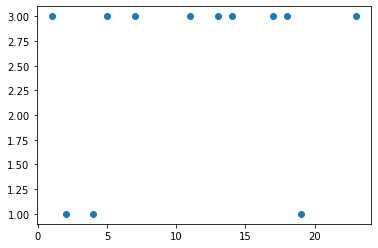

In [66]:
a = votes_by_season[2012]["Swan, Dane"]
rounds = [int(i) for i in a.keys()]
v = [int(i) for i in a.values()]
plt.scatter(rounds,v)
plt.show()

In [56]:
votes_by_season[2012]

defaultdict(dict,
            {'Swan, Dane': {1: 3,
              2: 1,
              4: 1,
              5: 3,
              7: 3,
              11: 3,
              13: 3,
              14: 3,
              17: 3,
              18: 3,
              19: 1,
              23: 3},
             'Pendlebury, Scott': {1: 2, 5: 1, 7: 1, 8: 1, 17: 2},
             'Mitchell, Sam': {1: 1,
              2: 2,
              4: 1,
              6: 1,
              10: 2,
              15: 1,
              16: 2,
              23: 1},
             'Stanton, Brent': {1: 3,
              2: 2,
              4: 3,
              6: 3,
              7: 3,
              9: 2,
              13: 2,
              14: 1},
             'Wells, Daniel': {1: 2, 8: 2, 13: 3, 14: 3, 16: 1},
             'Watson, Jobe': {1: 1,
              6: 2,
              7: 2,
              8: 1,
              10: 3,
              11: 3,
              13: 1,
              16: 3,
              17: 1,
              18: 2,
   

In [54]:
totals = []
for i in votes_by_season[2018].items():
    player_votes = []
    player_votes.append(i[0])
    total = 0
    for j in i[1].values():
        total += j
    player_votes.append(total)
    totals.append(player_votes)

In [55]:
sorted(totals, key = lambda x: x[1], reverse = True)

[['Mitchell, Tom', 36],
 ['Macrae, Jack', 29],
 ['Gaff, Andrew', 29],
 ['Ross, Sebastian', 28],
 ['Beams, Dayne', 26],
 ['Lloyd, Jake', 23],
 ['Sidebottom, Steele', 22],
 ['Ablett, Gary', 20],
 ['Dangerfield, Patrick', 20],
 ['Higgins, Shaun', 20],
 ['Heppell, Dyson', 19],
 ['Martin, Dustin', 19],
 ['Fyfe, Nat', 19],
 ['Crouch, Matt', 18],
 ['Laird, Rory', 18],
 ['Coniglio, Stephen', 17],
 ['Steven, Jack', 17],
 ['Whitfield, Lachie', 17],
 ['Zaharakis, David', 17],
 ['Brayshaw, Angus', 17],
 ['Cripps, Patrick', 16],
 ['Oliver, Clayton', 16],
 ['Langdon, Ed', 16],
 ['Franklin, Lance', 15],
 ['Hunter, Lachie', 15],
 ['Kennedy, Josh P', 15],
 ['Yeo, Elliot', 15],
 ['Kelly, Josh', 15],
 ['Shiels, Liam', 14],
 ['Treloar, Adam', 14],
 ['Selwood, Joel', 13],
 ['Simpson, Kade', 13],
 ['Neale, Lachie', 13],
 ['Phillips, Tom', 13],
 ['Gibbs, Bryce', 12],
 ['Wines, Ollie', 12],
 ['Billings, Jack', 11],
 ['Polec, Jared', 11],
 ['Witherden, Alex', 11],
 ['Merrett, Zach', 11],
 ['Redden, Jack', 11],

In [9]:
# Finding actual Brownlow votes from those years from the dataset
actual_votes_by_season = dict()
for i in seasons:
    actual_votes = dict()
    players = stats[stats.Season == i].groupby("Player")
    players = players.sum().sort_values("BrownlowVotes", ascending = False)
    for j in players.index:
        if not players.loc[j, "BrownlowVotes"]:
            break
        actual_votes[j] = players.loc[j, "BrownlowVotes"]
    actual_votes_by_season[i] = (actual_votes)

In [10]:
b = actual_votes_by_season[2018]

In [11]:
a = {k: v for k, v in sorted(votes_by_season[2018].items(), key=lambda item: item[1], reverse = True)}

In [12]:
sd = 0
for i in a.keys()&b.keys():
    sd += (a[i] - b[i])**2

In [13]:
c = [(k,v) for k,v in a.items()]
d = [(k,v) for k,v in b.items()]

In [14]:
corrects = []
almost = []
for i in seasons:
    correct = 0
    a = {k: v for k, v in sorted(votes_by_season[i].items(), key=lambda item: item[1], reverse = True)}
    b = b = actual_votes_by_season[i]
    c = [(k,v) for k,v in a.items()]
    d = [(k,v) for k,v in b.items()]
    for j in range(5):
        if c[j][0] == d[j][0]:# or c[j+1][0] == d[j][0] or c[j-1][0] == d[j][0] or c[j+2][0] == d[j][0] or c[j-2][0] == d[j][0]:
            correct += 1
            almost.append(c[j][0])
    almost.append("YEAR")
    corrects.append(correct)
    
        

In [15]:
sum(corrects)/(7*5) 

0.2

In [16]:
sorted(votes_by_season[2014].items(), reverse = True, key=lambda x: (x[1], x[0]))

[('Macrae, Jack', 26),
 ('Rockliff, Tom', 20),
 ('Johnson, Steve', 20),
 ('Boak, Travis', 20),
 ('Tyson, Dom', 19),
 ('Sidebottom, Steele', 19),
 ('Ablett, Gary', 19),
 ('Greenwood, Levi', 18),
 ('Martin, Dustin', 17),
 ('Lewis, Jordan', 17),
 ('Gray, Robbie', 17),
 ('Boyd, Matthew', 17),
 ('Beams, Dayne', 17),
 ('Zaharakis, David', 16),
 ('Selwood, Joel', 16),
 ('Gibbs, Bryce', 16),
 ('Heppell, Dyson', 15),
 ('Harvey, Brent', 15),
 ('Deledio, Brett', 15),
 ('Prestia, Dion', 14),
 ('Kennedy, Josh P', 14),
 ('Goddard, Brendon', 14),
 ('Gibson, Sam', 14),
 ('Vince, Bernie', 13),
 ('Treloar, Adam', 13),
 ('Fyfe, Nat', 13),
 ('Barlow, Michael', 13),
 ('Stanton, Brent', 12),
 ('Smith, Brodie', 12),
 ('McVeigh, Jarrad', 12),
 ('Jones, Nathan', 12),
 ('Cotchin, Trent', 12),
 ('Sloane, Rory', 11),
 ('Pendlebury, Scott', 11),
 ('Murphy, Marc', 11),
 ('Hanley, Pearce', 11),
 ('Ellis, Brandon', 11),
 ('Dangerfield, Patrick', 11),
 ('Thompson, Scott', 10),
 ('Stokes, Mathew', 10),
 ('Simpson, Kade